In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sns.set_context('paper')
metrics = ['dc', 'bc', 'cc', 'ec']

# Helper functions

In [3]:
def count_missing_values(df):
    #counting missing observations
    na_df = pd.DataFrame(df.isnull().sum())
    na_df.columns = ['missing_observations']

    na_df['percentage'] = (na_df.missing_observations / df.shape[0]).mul(100).round(2).astype(str)+'%'

    # formatting numeric values with commas
    na_df.missing_observations = na_df.missing_observations.map('{:,}'.format)
    na_df = pd.DataFrame(data=na_df)

    return na_df

# Barabási Albert

In [4]:
path = "../results/BA.csv"
ba_df = pd.read_csv(path)
ba_df.head()

,exp_name,sigma_mean,sigma_variance,uncertainty_mean,uncertainty_variance,dc_distance,dc_correlation,dc_mean_change,bc_distance,bc_correlation,bc_mean_change,cc_distance,cc_correlation,cc_mean_change,ec_distance,ec_correlation,ec_mean_change
0,BA_100_0.1_0.1,1.118249,0.120379,7.241849,13.427769,0.019394,0.988419,0.106667,0.000606,0.987063,0.039266,0.009923,0.977906,0.018363,0.001650,0.993663,0.000009
1,BA_100_0.1_0.2,1.084331,0.016835,12.493792,42.395566,0.038788,0.996688,0.213333,0.000807,0.989175,0.079473,0.020659,0.960372,0.038231,0.003025,0.984638,0.013365
2,BA_100_0.1_0.3,1.082845,0.005145,16.662847,76.224838,0.058384,1.000000,0.321111,0.001144,0.985503,0.109570,0.029260,0.952379,0.054149,0.003559,0.978434,0.016006
3,BA_100_0.1_0.4,1.052547,0.002509,19.866338,111.981116,0.076162,1.000000,0.418889,0.001216,0.983642,0.134258,0.036717,0.946967,0.067949,0.003689,0.973285,0.017686
4,BA_100_0.1_0.5,1.024542,0.001657,22.429234,135.844970,0.092323,0.999964,0.507778,0.001344,0.977870,0.153304,0.042660,0.935854,0.078948,0.003708,0.971629,0.017008


In [5]:
ba_df[['model', 'n', 'm_frac', 'r']] = ba_df.exp_name.str.split('_', expand=True)
ba_df = ba_df.drop(['exp_name', 'model'], axis=1)
ba_df.head(1)

,sigma_mean,sigma_variance,uncertainty_mean,uncertainty_variance,dc_distance,dc_correlation,dc_mean_change,bc_distance,bc_correlation,bc_mean_change,cc_distance,cc_correlation,cc_mean_change,ec_distance,ec_correlation,ec_mean_change,n,m_frac,r
0,1.118249,0.120379,7.241849,13.427769,0.019394,0.988419,0.106667,0.000606,0.987063,0.039266,0.009923,0.977906,0.018363,0.00165,0.993663,0.000009,100,0.1,0.1


In [6]:
ba_df.n = ba_df.n.astype(int)
ba_df.m_frac = ba_df.m_frac.astype(float)
ba_df.r = ba_df.r.astype(float)
ba_df.dtypes

sigma_mean              float64
sigma_variance          float64
uncertainty_mean        float64
uncertainty_variance    float64
dc_distance             float64
dc_correlation          float64
dc_mean_change          float64
bc_distance             float64
bc_correlation          float64
bc_mean_change          float64
cc_distance             float64
cc_correlation          float64
cc_mean_change          float64
ec_distance             float64
ec_correlation          float64
ec_mean_change          float64
n                         int64
m_frac                  float64
r                       float64
dtype: object

In [7]:
ba_df = ba_df.rename(columns={'m_frac': 'm / n'})
col_wrap = 3

In [8]:
count_missing_values(ba_df)

,missing_observations,percentage
sigma_mean,0,0.0%
sigma_variance,0,0.0%
uncertainty_mean,0,0.0%
uncertainty_variance,0,0.0%
dc_distance,0,0.0%
dc_correlation,0,0.0%
dc_mean_change,0,0.0%
bc_distance,0,0.0%
bc_correlation,0,0.0%
bc_mean_change,0,0.0%


In [9]:
ba_df.shape

(1000, 19)

In [ ]:
ba_df = ba_df[ba_df['m / n'] < 1.0]
ba_df.shape

In [10]:
sns.set_style("whitegrid")

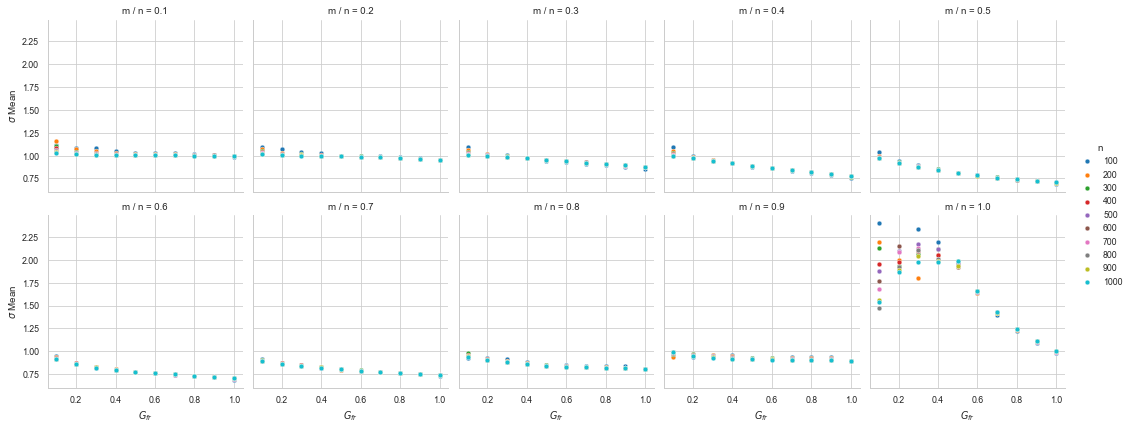

In [11]:
# SIGMA MEAN
g = sns.FacetGrid(ba_df, col='m / n', hue="n", col_wrap=col_wrap)
g.map(sns.scatterplot, "r", "sigma_mean")
g.set_xlabels("$G_{fr}$")
g.set_ylabels("$\sigma$ Mean")
g.add_legend()
plt.savefig('images/ba/sigma_mean.png', dpi=300, transparent=False);

In [ ]:
# SIGMA VARIANCE
g = sns.FacetGrid(ba_df, col='m / n', hue="n", col_wrap=col_wrap)
g.map(sns.scatterplot, "r", "sigma_variance")
g.set_axis_labels("$G_{fr}$", "$\sigma$ Variance")
g.add_legend()
plt.savefig('images/ba/sigma_variance.png', dpi=300, transparent=False);


In [ ]:
# UNCERTAINTY MEAN
g = sns.FacetGrid(ba_df, col='m / n', hue="n", col_wrap=col_wrap)
g.map(sns.scatterplot, "r", "uncertainty_mean")
g.set_axis_labels("$G_{fr}$", "Uncertainty Mean [bits]")
g.add_legend()
plt.savefig('images/ba/uncertainty_mean.png', dpi=300, transparent=False);

In [ ]:
# UNCERTAINTY VARIANCE
g = sns.FacetGrid(ba_df, col='m / n', hue="n", col_wrap=col_wrap)
g.map(sns.scatterplot, "r", "uncertainty_variance")
g.set_axis_labels("$G_{fr}$", r"Uncertainty Variance [$bits^2$]")
g.add_legend()
plt.savefig('images/ba/uncertainty_variance.png', dpi=300, transparent=False);

In [ ]:
for metric in metrics:

    # Wasserstein distance
    g = sns.FacetGrid(ba_df, col='m / n', hue="n", col_wrap=col_wrap)
    g.map(sns.scatterplot, "r", f"{metric}_distance")
    g.set_axis_labels("$G_{fr}$", f"{metric.upper()} Wasserstein Distance")
    g.add_legend()
    plt.savefig(f'images/ba/{metric}_distance.png', dpi=300, transparent=False)

    # Spearman Rank correlation
    g = sns.FacetGrid(ba_df, col='m / n', hue="n", col_wrap=col_wrap)
    g.map(sns.scatterplot, "r", f"{metric}_correlation")
    g.set_axis_labels("$G_{fr}$", f"{metric.upper()} Spearman Coefficient")
    g.add_legend()
    plt.savefig(f'images/ba/{metric}_correlation.png', dpi=300, transparent=False)

    # Mean change
    g = sns.FacetGrid(ba_df, col='m / n', hue="n", col_wrap=col_wrap)
    g.map(sns.scatterplot, "r", f"{metric}_mean_change")
    g.set_axis_labels("$G_{fr}$", f"{metric.upper()} Mean Change")
    g.add_legend()
    plt.savefig(f'images/ba/{metric}_mean_change.png', dpi=300, transparent=False)
